<a href="https://colab.research.google.com/github/manglesh001/DL-assigment1/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

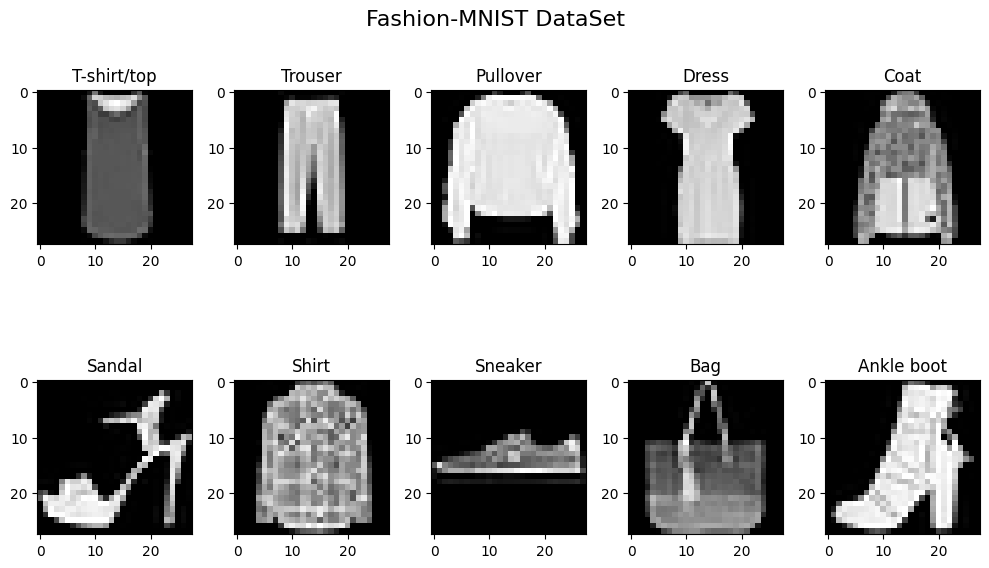

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure to plot the images
plt.figure(figsize=(10, 15))
plt.suptitle("Fashion-MNIST DataSet", fontsize=16)

# Plot one sample image for each class
for i in range(len(class_names)):
    # Find the first occurrence of each class in the training set
    idx = np.where(y_train == i)[0][1]

    # Plot the image
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('on')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-learn --upgrade


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Define the neural network
class FeedforwardNeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, x):
        self.activations = [x]
        self.z_values = []

        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            if i == len(self.weights) - 1:
                # Output layer uses softmax
                activation = self.softmax(z)
            else:
                # Hidden layers use sigmoid
                activation = self.sigmoid(z)
            self.activations.append(activation)

        return self.activations[-1]  # Return the output probabilities

    def backward(self, x, y):
        m = x.shape[0]
        self.deltas = [None] * len(self.weights)

        # Output layer error
        output_error = self.activations[-1] - y
        self.deltas[-1] = output_error

        # Backpropagate errors
        for i in range(len(self.weights) - 2, -1, -1):
            error = np.dot(self.deltas[i + 1], self.weights[i + 1].T)
            self.deltas[i] = error * self.sigmoid_derivative(self.activations[i + 1])

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * np.dot(self.activations[i].T, self.deltas[i]) / m
            self.biases[i] -= self.learning_rate * np.sum(self.deltas[i], axis=0, keepdims=True) / m

    def train(self, x, y, epochs=10, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, x.shape[0], batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]

                # Forward pass
                self.forward(x_batch)

                # Backward pass
                self.backward(x_batch, y_batch)

            # Print loss every epoch
            predictions = self.forward(x)
            loss = -np.mean(y * np.log(predictions + 1e-10))
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict_probabilities(self, x):
        # Return the softmax probabilities for the input
        return self.forward(x)

# Define the network architecture
layer_sizes = [784, 128, 64, 10]  # Input layer: 784, Hidden layers: 128 and 64, Output layer: 10
model = FeedforwardNeuralNetwork(layer_sizes, learning_rate=0.1)

# Train the model
model.train(x_train, y_train, epochs=10, batch_size=32)

# Get the probability distribution for a sample from the test set
sample_index = 0  # Change this to any index in the test set
sample = x_test[sample_index].reshape(1, -1)  # Reshape to (1, 784)
probabilities = model.predict_probabilities(sample)

# Print the probability distribution
print("Probability distribution for the sample:")
for i, prob in enumerate(probabilities[0]):
    print(f"Class {i}: {prob:.4f}")

Epoch 1/10, Loss: 0.1840
Epoch 2/10, Loss: 0.0891
Epoch 3/10, Loss: 0.0672
Epoch 4/10, Loss: 0.0565
Epoch 5/10, Loss: 0.0504
Epoch 6/10, Loss: 0.0467
Epoch 7/10, Loss: 0.0440
Epoch 8/10, Loss: 0.0419
Epoch 9/10, Loss: 0.0402
Epoch 10/10, Loss: 0.0388
Probability distribution for the sample:
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.0998
Class 6: 0.0000
Class 7: 0.1519
Class 8: 0.0007
Class 9: 0.7475


In [2]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        cache[i] = beta * cache[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache[i]) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache[i]) + epsilon)
    return weights, biases, cache

def adam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = m[i] / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Training Loop
# def train_network(X_train, y_train, X_val, y_val, config):
#     np.random.seed(42)
#     layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
#     activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

#     weights, biases = initialize_weights(layers, config['weight_init'])
#     optimizer = config['optimizer']

#     velocity = [np.zeros_like(w) for w in weights]
#     cache = [np.zeros_like(w) for w in weights]
#     m = [np.zeros_like(w) for w in weights]
#     v = [np.zeros_like(w) for w in weights]

#     batch_size = config['batch_size']
#     epochs = config['epochs']
#     lr = config['learning_rate']

#     for epoch in range(epochs):
#         indices = np.random.permutation(X_train.shape[0])
#         X_train, y_train = X_train[indices], y_train[indices]

#         for i in range(0, X_train.shape[0], batch_size):
#             X_batch = X_train[i:i+batch_size]
#             y_batch = y_train[i:i+batch_size]

#             activations, zs = forward_propagation(X_batch, weights, biases, activation)
#             gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

#             if optimizer == 'sgd':
#                 weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
#             elif optimizer == 'momentum':
#                 weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'nesterov':
#                 weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'rmsprop':
#                 weights, biases, cache = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache)
#             elif optimizer == 'adam':
#                 weights, biases, m, v = adam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)
#             elif optimizer == 'nadam':
#                 weights, biases, m, v = nadam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)

#         # Validate model
#         activations, _ = forward_propagation(X_val, weights, biases, activation)
#         val_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "val_accuracy": val_accuracy})

#     return weights, biases

# Split training data into train and validation
# X_train, X_val = X_train[:54000], X_train[54000:]
# y_train, y_val = y_train[:54000], y_train[54000:]


#train_network(X_train, y_train, X_val, y_val, wandb.config)
# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
wandb.init(project="fashion-mnist")
sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: mangleshpatidar2233 (mangleshpatidar2233-iit-madras-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Create sweep with ID: 40ikqfuj
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/40ikqfuj


In [1]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

# def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache, beta=0.99, epsilon=1e-8):
#     for i in range(len(weights)):
#         cache[i] = beta * cache[i] + (1 - beta) * (gradients_w[i] ** 2)
#         weights[i] -= lr * gradients_w[i] / (np.sqrt(cache[i]) + epsilon)
#         biases[i] -= lr * gradients_b[i] / (np.sqrt(cache[i]) + epsilon)
#     return weights, biases, cache

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        # Update cache for weights
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)

        # Update cache for biases
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)

    return weights, biases, cache_w, cache_b

def adam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = m[i] / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

#Training Loop
# def train_network(X_train, y_train, X_val, y_val, config):
#     np.random.seed(42)
#     layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
#     activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

#     weights, biases = initialize_weights(layers, config['weight_init'])
#     optimizer = config['optimizer']

#     velocity = [np.zeros_like(w) for w in weights]
#     cache = [np.zeros_like(w) for w in weights]
#     m = [np.zeros_like(w) for w in weights]
#     v = [np.zeros_like(w) for w in weights]

#     batch_size = config['batch_size']
#     epochs = config['epochs']
#     lr = config['learning_rate']

#     for epoch in range(epochs):
#         indices = np.random.permutation(X_train.shape[0])
#         X_train, y_train = X_train[indices], y_train[indices]

#         for i in range(0, X_train.shape[0], batch_size):
#             X_batch = X_train[i:i+batch_size]
#             y_batch = y_train[i:i+batch_size]

#             activations, zs = forward_propagation(X_batch, weights, biases, activation)
#             gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

#             if optimizer == 'sgd':
#                 weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
#             elif optimizer == 'momentum':
#                 weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'nesterov':
#                 weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'rmsprop':
#                 weights, biases, cache = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache)
#             elif optimizer == 'adam':
#                 weights, biases, m, v = adam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)
#             elif optimizer == 'nadam':
#                 weights, biases, m, v = nadam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)

#         # Validate model
#         activations, _ = forward_propagation(X_val, weights, biases, activation)
#         val_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "val_accuracy": val_accuracy})

#     return weights, biases


def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    optimizer = config['optimizer']

    velocity = [np.zeros_like(w) for w in weights]
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train, y_train = X_train[indices], y_train[indices]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            activations, zs = forward_propagation(X_batch, weights, biases, activation)
            gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

            if optimizer == 'sgd':
                weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
            elif optimizer == 'momentum':
                weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'nesterov':
                weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'rmsprop':
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif optimizer == 'adam':
                weights, biases, m, v = adam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)
            elif optimizer == 'nadam':
                weights, biases, m, v = nadam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)

        # Validate model
        activations, _ = forward_propagation(X_val, weights, biases, activation)
        val_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_val, axis=1))
        print("Login")
        print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")
        print("Logout")
        wandb.log({"epoch": epoch+1, "val_accuracy": val_accuracy})

    return

#Split training data into train and validation
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]


# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}


# Train the network using WandB configuration
# wandb.init(project="fashion-mnist")
# sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
# #wt,bias=train_network(X_train, y_train, X_val, y_val, wandb.config)
# wandb.agent(sweep_id, function=train_network(X_train, y_train, X_val, y_val, wandb.config), count=5)

# wandb.finish()

def train():
    wandb.init()
    config = wandb.config
    train_network(X_train, y_train, X_val, y_val, config)

# Train the network using WandB configuration
sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
wandb.agent(sweep_id, function=train, count=5)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Create sweep with ID: czaw3pwk
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/czaw3pwk


wandb: Agent Starting Run: 12dev29i with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier
wandb: Currently logged in as: mangleshpatidar2233 (mangleshpatidar2233-iit-madras-alumni-association) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Run 12dev29i errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-1-ab24b17ca934>", line 283, in train
    train_network(X_train, y_train, X_val, y_val, config)
  File "<ipython-input-1-ab24b17ca934>", line 235, in train_network
    weights, biases, m, v = adam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-1-ab24b17ca934>", line 125, in adam
    biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
ValueError: non-broadcastable output operand with shape (1,64) doesn't match the broadcast shape (784,64)

wandb: ERROR Run 12dev29i errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
wandb: ERROR     self.

Login
Epoch 1/5, Validation Accuracy: 0.0973
Logout
Login
Epoch 2/5, Validation Accuracy: 0.0973
Logout
Login
Epoch 3/5, Validation Accuracy: 0.0942
Logout
Login
Epoch 4/5, Validation Accuracy: 0.0973
Logout
Login
Epoch 5/5, Validation Accuracy: 0.0942
Logout


epoch,▁▃▅▆█
val_accuracy,██▁█▁
epoch,5
val_accuracy,0.09417


wandb: Agent Starting Run: frxmgkah with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Login
Epoch 1/5, Validation Accuracy: 0.8355
Logout
Login
Epoch 2/5, Validation Accuracy: 0.8510
Logout
Login
Epoch 3/5, Validation Accuracy: 0.8573
Logout
Login
Epoch 4/5, Validation Accuracy: 0.8648
Logout
Login
Epoch 5/5, Validation Accuracy: 0.8760
Logout


epoch,▁▃▅▆█
val_accuracy,▁▄▅▆█
epoch,5
val_accuracy,0.876


wandb: Agent Starting Run: gymivb7o with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Login
Epoch 1/5, Validation Accuracy: 0.6073
Logout
Login
Epoch 2/5, Validation Accuracy: 0.7560
Logout
Login
Epoch 3/5, Validation Accuracy: 0.7957
Logout
Login
Epoch 4/5, Validation Accuracy: 0.8168
Logout
Login
Epoch 5/5, Validation Accuracy: 0.8258
Logout


epoch,▁▃▅▆█
val_accuracy,▁▆▇██
epoch,5
val_accuracy,0.82583


wandb: Agent Starting Run: j8jbuu0l with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Run j8jbuu0l errored:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-1-ab24b17ca934>", line 283, in train
    train_network(X_train, y_train, X_val, y_val, config)
  File "<ipython-input-1-ab24b17ca934>", line 237, in train_network
    weights, biases, m, v = nadam(weights, biases, gradients_w, gradients_b, lr, m, v, t=epoch+1)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-1-ab24b17ca934>", line 135, in nadam
    biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
ValueError: non-broadcastable output operand with shape (1,64) doesn't match the broadcast shape (784,64)

wandb: ERROR Run j8jbuu0l errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
wandb: ERROR     se

In [6]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Weight Initialization
def initialize_weights(layers, method="random"):
    weights = []
    biases = []
    for i in range(len(layers) - 1):
        if method == "xavier":
            weights.append(np.random.randn(layers[i], layers[i+1]) * np.sqrt(1 / layers[i]))
        else:  # random
            weights.append(np.random.randn(layers[i], layers[i+1]) * 0.01)
        biases.append(np.zeros((1, layers[i+1])))
    return weights, biases

# Forward Propagation
def forward_propagation(X, weights, biases, activation):
    activations = [X]
    zs = []

    for i in range(len(weights)):
        z = np.dot(activations[-1], weights[i]) + biases[i]
        zs.append(z)

        if activation[i] == "sigmoid":
            activations.append(sigmoid(z))
        elif activation[i] == "relu":
            activations.append(relu(z))
        elif activation[i] == "tanh":
            activations.append(tanh(z))

    return activations, zs

# Backpropagation
def backpropagation(y, activations, zs, weights, activation):
    gradients_w = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Output layer error
    error = activations[-1] - y

    for i in reversed(range(len(weights))):
        if activation[i] == "sigmoid":
            delta = error * sigmoid_derivative(activations[i+1])
        elif activation[i] == "relu":
            delta = error * relu_derivative(activations[i+1])
        elif activation[i] == "tanh":
            delta = error * tanh_derivative(activations[i+1])

        gradients_w[i] = np.dot(activations[i].T, delta)
        gradients_b[i] = np.sum(delta, axis=0, keepdims=True)

        error = np.dot(delta, weights[i].T)

    return gradients_w, gradients_b

# Optimizers
def sgd(weights, biases, gradients_w, gradients_b, lr):
    for i in range(len(weights)):
        weights[i] -= lr * gradients_w[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases

def momentum(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        velocity[i] = beta * velocity[i] + (1 - beta) * gradients_w[i]
        weights[i] -= lr * velocity[i]
        biases[i] -= lr * gradients_b[i]
    return weights, biases, velocity

def nesterov(weights, biases, gradients_w, gradients_b, lr, velocity, beta=0.9):
    for i in range(len(weights)):
        temp_velocity = beta * velocity[i]
        weights[i] -= lr * (beta * temp_velocity + (1 - beta) * gradients_w[i])
        biases[i] -= lr * gradients_b[i]
        velocity[i] = temp_velocity + (1 - beta) * gradients_w[i]
    return weights, biases, velocity

def rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b, beta=0.99, epsilon=1e-8):
    for i in range(len(weights)):
        # Update cache for weights
        cache_w[i] = beta * cache_w[i] + (1 - beta) * (gradients_w[i] ** 2)
        weights[i] -= lr * gradients_w[i] / (np.sqrt(cache_w[i]) + epsilon)

        # Update cache for biases
        cache_b[i] = beta * cache_b[i] + (1 - beta) * (gradients_b[i] ** 2)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(cache_b[i]) + epsilon)

    return weights, biases, cache_w, cache_b


def adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        # Update for weights
        m_w[i] = beta1 * m_w[i] + (1 - beta1) * gradients_w[i]
        v_w[i] = beta2 * v_w[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat_w = m_w[i] / (1 - beta1 ** t)
        v_hat_w = v_w[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat_w / (np.sqrt(v_hat_w) + epsilon)

        # Update for biases
        m_b[i] = beta1 * m_b[i] + (1 - beta1) * gradients_b[i]
        v_b[i] = beta2 * v_b[i] + (1 - beta2) * (gradients_b[i] ** 2)
        m_hat_b = m_b[i] / (1 - beta1 ** t)
        v_hat_b = v_b[i] / (1 - beta2 ** t)
        biases[i] -= lr * m_hat_b / (np.sqrt(v_hat_b) + epsilon)

    return weights, biases, m_w, v_w, m_b, v_b

def nadam(weights, biases, gradients_w, gradients_b, lr, m, v, beta1=0.9, beta2=0.999, epsilon=1e-8, t=1):
    for i in range(len(weights)):
        m[i] = beta1 * m[i] + (1 - beta1) * gradients_w[i]
        v[i] = beta2 * v[i] + (1 - beta2) * (gradients_w[i] ** 2)
        m_hat = (beta1 * m[i] + (1 - beta1) * gradients_w[i]) / (1 - beta1 ** t)
        v_hat = v[i] / (1 - beta2 ** t)
        weights[i] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        biases[i] -= lr * gradients_b[i] / (np.sqrt(v_hat) + epsilon)
    return weights, biases, m, v

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# def train_network(X_train, y_train, X_val, y_val, config):
#     np.random.seed(42)
#     layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
#     activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

#     weights, biases = initialize_weights(layers, config['weight_init'])
#     optimizer = config['optimizer']

#     velocity = [np.zeros_like(w) for w in weights]
#     cache_w = [np.zeros_like(w) for w in weights]
#     cache_b = [np.zeros_like(b) for b in biases]
#     m_w = [np.zeros_like(w) for w in weights]  # For weights
#     v_w = [np.zeros_like(w) for w in weights]  # For weights
#     m_b = [np.zeros_like(b) for b in biases]   # For biases
#     v_b = [np.zeros_like(b) for b in biases]   # For biases

#     batch_size = config['batch_size']
#     epochs = config['epochs']
#     lr = config['learning_rate']

#     for epoch in range(epochs):
#         indices = np.random.permutation(X_train.shape[0])
#         X_train, y_train = X_train[indices], y_train[indices]

#         for i in range(0, X_train.shape[0], batch_size):
#             X_batch = X_train[i:i+batch_size]
#             y_batch = y_train[i:i+batch_size]

#             activations, zs = forward_propagation(X_batch, weights, biases, activation)
#             gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

#             if optimizer == 'sgd':
#                 weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
#             elif optimizer == 'momentum':
#                 weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'nesterov':
#                 weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
#             elif optimizer == 'rmsprop':
#                 weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
#             elif optimizer == 'adam':
#                 weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
#             elif optimizer == 'nadam':
#                 # Update nadam similarly if needed
#                 pass

#         # Validate model
#         activations, _ = forward_propagation(X_val, weights, biases, activation)

#         train_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_train, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Train Accuracy: {train_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "train_accuracy": train_accuracy})

#         val_accuracy = np.mean(np.argmax(activations[-1], axis=1) == np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Accuracy: {val_accuracy:.4f}")
#         wandb.log({"epoch": epoch+1, "val_accuracy": val_accuracy})

#         train_loss = np.mean(np.argmax(activations[-1], axis=1) != np.argmax(y_train, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}")
#         wandb.log({"epoch": epoch+1, "train_loss": train_loss})

#         val_loss = np.mean(np.argmax(activations[-1], axis=1) != np.argmax(y_val, axis=1))
#         print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")
#         wandb.log({"epoch": epoch+1, "val_loss}": val_loss})





#     return


def train_network(X_train, y_train, X_val, y_val, config):
    np.random.seed(42)
    layers = [X_train.shape[1]] + [config['hidden_size']] * config['hidden_layers'] + [10]
    activation = [config['activation']] * config['hidden_layers'] + ['sigmoid']

    weights, biases = initialize_weights(layers, config['weight_init'])
    optimizer = config['optimizer']

    velocity = [np.zeros_like(w) for w in weights]
    cache_w = [np.zeros_like(w) for w in weights]
    cache_b = [np.zeros_like(b) for b in biases]
    m_w = [np.zeros_like(w) for w in weights]  # For weights
    v_w = [np.zeros_like(w) for w in weights]  # For weights
    m_b = [np.zeros_like(b) for b in biases]   # For biases
    v_b = [np.zeros_like(b) for b in biases]   # For biases

    batch_size = config['batch_size']
    epochs = config['epochs']
    lr = config['learning_rate']

    for epoch in range(epochs):
        indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled, y_train_shuffled = X_train[indices], y_train[indices]

        train_loss = 0
        train_correct = 0
        train_total = 0

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            # Forward propagation
            activations, zs = forward_propagation(X_batch, weights, biases, activation)

            # Calculate training loss (cross-entropy loss)
            output = activations[-1]
            train_loss += -np.sum(y_batch * np.log(output + 1e-8)) / len(y_batch)

            # Calculate training accuracy
            train_preds = np.argmax(output, axis=1)
            train_true = np.argmax(y_batch, axis=1)
            train_correct += np.sum(train_preds == train_true)
            train_total += len(y_batch)

            # Backpropagation
            gradients_w, gradients_b = backpropagation(y_batch, activations, zs, weights, activation)

            # Update weights and biases based on optimizer
            if optimizer == 'sgd':
                weights, biases = sgd(weights, biases, gradients_w, gradients_b, lr)
            elif optimizer == 'momentum':
                weights, biases, velocity = momentum(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'nesterov':
                weights, biases, velocity = nesterov(weights, biases, gradients_w, gradients_b, lr, velocity)
            elif optimizer == 'rmsprop':
                weights, biases, cache_w, cache_b = rmsprop(weights, biases, gradients_w, gradients_b, lr, cache_w, cache_b)
            elif optimizer == 'adam':
                weights, biases, m_w, v_w, m_b, v_b = adam(weights, biases, gradients_w, gradients_b, lr, m_w, v_w, m_b, v_b, t=epoch+1)
            elif optimizer == 'nadam':
                # Update nadam similarly if needed
                pass

        # Calculate average training loss and accuracy for the epoch
        train_loss /= (X_train_shuffled.shape[0] // batch_size)
        train_accuracy = train_correct / train_total

        # Validate model
        val_activations, _ = forward_propagation(X_val, weights, biases, activation)
        val_loss = -np.sum(y_val * np.log(val_activations[-1] + 1e-8)) / len(y_val)
        val_accuracy = np.mean(np.argmax(val_activations[-1], axis=1) == np.argmax(y_val, axis=1))

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": val_loss,
            "val_accuracy": val_accuracy
        })

        # Print metrics
        print(f"Epoch {epoch + 1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return

# Split training data into train and validation
X_train, X_val = X_train[:54000], X_train[54000:]
y_train, y_val = y_train[:54000], y_train[54000:]

# Hyperparameter tuning with wandb
sweep_config = {
    'method': 'random',
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'epochs': {'values': [5, 10]},
        'hidden_layers': {'values': [3, 4, 5]},
        'hidden_size': {'values': [32, 64, 128]},
        'weight_decay': {'values': [0, 0.0005, 0.5]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'optimizer': {'values': ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']},
        'batch_size': {'values': [16, 32, 64]},
        'weight_init': {'values': ['random', 'xavier']},
        'activation': {'values': ['sigmoid', 'tanh', 'relu']}
    }
}

# Train the network using WandB configuration
def train():
    wandb.init()
    config = wandb.config
    train_network(X_train, y_train, X_val, y_val, config)

sweep_id = wandb.sweep(sweep_config, project="fashion-mnist")
wandb.agent(sweep_id, function=train, count=20)

wandb.finish()

Create sweep with ID: 1sts7fuf
Sweep URL: https://wandb.ai/mangleshpatidar2233-iit-madras-alumni-association/fashion-mnist/sweeps/1sts7fuf


wandb: Agent Starting Run: hdfk6w9j with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.1230, Train Accuracy: 0.4774, Val Loss: 1.5599, Val Accuracy: 0.7007
Epoch 2/5, Train Loss: 1.2003, Train Accuracy: 0.7344, Val Loss: 0.6266, Val Accuracy: 0.7855
Epoch 3/5, Train Loss: 0.5754, Train Accuracy: 0.8071, Val Loss: 0.5361, Val Accuracy: 0.8198
Epoch 4/5, Train Loss: 0.5294, Train Accuracy: 0.8283, Val Loss: 0.4969, Val Accuracy: 0.8315
Epoch 5/5, Train Loss: 0.5039, Train Accuracy: 0.8380, Val Loss: 0.4730, Val Accuracy: 0.8363


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▄▁▁▁
val_accuracy,▁▅▇██
val_loss,█▂▁▁▁
epoch,5
train_accuracy,0.83802
train_loss,0.50394
val_accuracy,0.83633
val_loss,0.47296


wandb: Agent Starting Run: 1ut84q36 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.2992, Train Accuracy: 0.1013, Val Loss: 2.3067, Val Accuracy: 0.0925
Epoch 2/10, Train Loss: 1.9242, Train Accuracy: 0.2145, Val Loss: 1.7297, Val Accuracy: 0.2837
Epoch 3/10, Train Loss: 1.6675, Train Accuracy: 0.2585, Val Loss: 1.5456, Val Accuracy: 0.2802
Epoch 4/10, Train Loss: 1.5335, Train Accuracy: 0.2862, Val Loss: 1.5341, Val Accuracy: 0.2615
Epoch 5/10, Train Loss: 1.5435, Train Accuracy: 0.2789, Val Loss: 1.5263, Val Accuracy: 0.2833
Epoch 6/10, Train Loss: 1.5269, Train Accuracy: 0.2850, Val Loss: 1.5530, Val Accuracy: 0.2877
Epoch 7/10, Train Loss: 1.5591, Train Accuracy: 0.2834, Val Loss: 1.5733, Val Accuracy: 0.2640
Epoch 8/10, Train Loss: 1.5688, Train Accuracy: 0.2966, Val Loss: 1.5603, Val Accuracy: 0.3092
Epoch 9/10, Train Loss: 1.5366, Train Accuracy: 0.3042, Val Loss: 1.5337, Val Accuracy: 0.3073
Epoch 10/10, Train Loss: 1.5509, Train Accuracy: 0.2968, Val Loss: 1.5357, Val Accuracy: 0.2903


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇▇▇███
train_loss,█▅▂▁▁▁▁▁▁▁
val_accuracy,▁▇▇▆▇▇▇██▇
val_loss,█▃▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.2968
train_loss,1.55088
val_accuracy,0.29033
val_loss,1.53567


wandb: Agent Starting Run: kh7wgj5a with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.5600, Train Accuracy: 0.3398, Val Loss: 0.9845, Val Accuracy: 0.5507
Epoch 2/5, Train Loss: 0.9619, Train Accuracy: 0.6053, Val Loss: 0.8748, Val Accuracy: 0.6963
Epoch 3/5, Train Loss: 0.8473, Train Accuracy: 0.7724, Val Loss: 0.8243, Val Accuracy: 0.8118
Epoch 4/5, Train Loss: 0.8569, Train Accuracy: 0.8227, Val Loss: 0.9404, Val Accuracy: 0.8193
Epoch 5/5, Train Loss: 0.8921, Train Accuracy: 0.8357, Val Loss: 0.9693, Val Accuracy: 0.8233


epoch,▁▃▅▆█
train_accuracy,▁▅▇██
train_loss,█▂▁▁▁
val_accuracy,▁▅███
val_loss,█▃▁▆▇
epoch,5
train_accuracy,0.83567
train_loss,0.89209
val_accuracy,0.82333
val_loss,0.96925


wandb: Agent Starting Run: pfsgch91 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.7336, Train Accuracy: 0.3908, Val Loss: 1.6370, Val Accuracy: 0.4817
Epoch 2/5, Train Loss: 1.4031, Train Accuracy: 0.5501, Val Loss: 1.2240, Val Accuracy: 0.6107
Epoch 3/5, Train Loss: 1.1078, Train Accuracy: 0.6235, Val Loss: 1.0084, Val Accuracy: 0.6600
Epoch 4/5, Train Loss: 0.9538, Train Accuracy: 0.6684, Val Loss: 0.8833, Val Accuracy: 0.6990
Epoch 5/5, Train Loss: 0.8569, Train Accuracy: 0.7066, Val Loss: 0.8055, Val Accuracy: 0.7267


epoch,▁▃▅▆█
train_accuracy,▁▅▆▇█
train_loss,█▅▃▂▁
val_accuracy,▁▅▆▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.70656
train_loss,0.85692
val_accuracy,0.72667
val_loss,0.80549


wandb: Agent Starting Run: amfyg6iz with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 1.7718, Train Accuracy: 0.1116, Val Loss: 2.2824, Val Accuracy: 0.1738
Epoch 2/5, Train Loss: 2.2820, Train Accuracy: 0.1649, Val Loss: 2.2853, Val Accuracy: 0.2315
Epoch 3/5, Train Loss: 2.2838, Train Accuracy: 0.1889, Val Loss: 2.2866, Val Accuracy: 0.1957
Epoch 4/5, Train Loss: 2.2806, Train Accuracy: 0.1937, Val Loss: 2.2784, Val Accuracy: 0.1860
Epoch 5/5, Train Loss: 2.2492, Train Accuracy: 0.1895, Val Loss: 2.1879, Val Accuracy: 0.1940


epoch,▁▃▅▆█
train_accuracy,▁▆███
train_loss,▁████
val_accuracy,▁█▄▂▃
val_loss,███▇▁
epoch,5
train_accuracy,0.18948
train_loss,2.24917
val_accuracy,0.194
val_loss,2.18788


wandb: Agent Starting Run: zznsh9hv with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.6818, Train Accuracy: 0.0989, Val Loss: 2.2185, Val Accuracy: 0.1008
Epoch 2/10, Train Loss: 2.2813, Train Accuracy: 0.1000, Val Loss: 2.2998, Val Accuracy: 0.0973
Epoch 3/10, Train Loss: 2.3046, Train Accuracy: 0.0988, Val Loss: 2.3028, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.3055, Train Accuracy: 0.0990, Val Loss: 2.3029, Val Accuracy: 0.0973
Epoch 5/10, Train Loss: 2.3055, Train Accuracy: 0.0988, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.3055, Train Accuracy: 0.0979, Val Loss: 2.3030, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.3055, Train Accuracy: 0.0974, Val Loss: 2.3028, Val Accuracy: 0.1008
Epoch 9/10, Train Loss: 2.3055, Train Accuracy: 0.0994, Val Loss: 2.3029, Val Accuracy: 0.0942
Epoch 10/10, Train Loss: 2.3055, Train Accuracy: 0.0992, Val Loss: 2.3029, Val Accuracy: 0.0973


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅█▅▅▅▆▂▁▇▆
train_loss,▁█████████
val_accuracy,█▅▂▅▁▁▁█▂▅
val_loss,▁█████████
epoch,10
train_accuracy,0.09924
train_loss,2.30549
val_accuracy,0.09733
val_loss,2.3029


wandb: Agent Starting Run: ndui8zqr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.3932, Train Accuracy: 0.0995, Val Loss: 1.7923, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 1.9522, Train Accuracy: 0.0993, Val Loss: 2.0632, Val Accuracy: 0.0942
Epoch 3/10, Train Loss: 2.1291, Train Accuracy: 0.0973, Val Loss: 2.1762, Val Accuracy: 0.0942
Epoch 4/10, Train Loss: 2.2099, Train Accuracy: 0.0990, Val Loss: 2.2326, Val Accuracy: 0.0925
Epoch 5/10, Train Loss: 2.2517, Train Accuracy: 0.0988, Val Loss: 2.2629, Val Accuracy: 0.0925
Epoch 6/10, Train Loss: 2.2747, Train Accuracy: 0.0990, Val Loss: 2.2798, Val Accuracy: 0.0925
Epoch 7/10, Train Loss: 2.2876, Train Accuracy: 0.1008, Val Loss: 2.2895, Val Accuracy: 0.0925
Epoch 8/10, Train Loss: 2.2951, Train Accuracy: 0.0999, Val Loss: 2.2951, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.2994, Train Accuracy: 0.1008, Val Loss: 2.2983, Val Accuracy: 0.0925
Epoch 10/10, Train Loss: 2.3019, Train Accuracy: 0.0990, Val Loss: 2.3002, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▅▅▁▄▄▄█▆█▄
train_loss,▁▅▇▇██████
val_accuracy,███▁▁▁▁▁▁▁
val_loss,▁▅▆▇▇█████
epoch,10
train_accuracy,0.09896
train_loss,2.30187
val_accuracy,0.0925
val_loss,2.30017


wandb: Agent Starting Run: tvdh0ckt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 2.1430, Train Accuracy: 0.1000, Val Loss: 2.3010, Val Accuracy: 0.0942
Epoch 2/10, Train Loss: 2.3041, Train Accuracy: 0.0975, Val Loss: 2.3031, Val Accuracy: 0.1003
Epoch 3/10, Train Loss: 2.3045, Train Accuracy: 0.0999, Val Loss: 2.3035, Val Accuracy: 0.0973
Epoch 4/10, Train Loss: 2.3045, Train Accuracy: 0.0996, Val Loss: 2.3030, Val Accuracy: 0.1008
Epoch 5/10, Train Loss: 2.3044, Train Accuracy: 0.1013, Val Loss: 2.3033, Val Accuracy: 0.1008
Epoch 6/10, Train Loss: 2.3046, Train Accuracy: 0.0983, Val Loss: 2.3030, Val Accuracy: 0.1050
Epoch 7/10, Train Loss: 2.3045, Train Accuracy: 0.0989, Val Loss: 2.3032, Val Accuracy: 0.0942
Epoch 8/10, Train Loss: 2.3045, Train Accuracy: 0.0983, Val Loss: 2.3034, Val Accuracy: 0.0925
Epoch 9/10, Train Loss: 2.3044, Train Accuracy: 0.0998, Val Loss: 2.3026, Val Accuracy: 0.1027
Epoch 10/10, Train Loss: 2.3045, Train Accuracy: 0.0971, Val Loss: 2.3031, Val Accuracy: 0.0925


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▆▂▆▅█▃▄▃▆▁
train_loss,▁█████████
val_accuracy,▂▅▄▆▆█▂▁▇▁
val_loss,▁▇█▇▇▇▇█▅▇
epoch,10
train_accuracy,0.09709
train_loss,2.30452
val_accuracy,0.0925
val_loss,2.30311


wandb: Agent Starting Run: h9sd642j with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 8.9742, Train Accuracy: 0.1081, Val Loss: 11.2494, Val Accuracy: 0.1037


<ipython-input-6-7942a0662a95>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 2/5, Train Loss: 11.5522, Train Accuracy: 0.1991, Val Loss: 11.8919, Val Accuracy: 0.1897
Epoch 3/5, Train Loss: 11.5879, Train Accuracy: 0.2606, Val Loss: 11.7835, Val Accuracy: 0.3023
Epoch 4/5, Train Loss: 11.5137, Train Accuracy: 0.3415, Val Loss: 11.5912, Val Accuracy: 0.3637
Epoch 5/5, Train Loss: 11.4846, Train Accuracy: 0.3737, Val Loss: 11.6359, Val Accuracy: 0.3665


epoch,▁▃▅▆█
train_accuracy,▁▃▅▇█
train_loss,▁████
val_accuracy,▁▃▆██
val_loss,▁█▇▅▅
epoch,5
train_accuracy,0.37369
train_loss,11.48459
val_accuracy,0.3665
val_loss,11.63588


wandb: Agent Starting Run: u13v24qm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/10, Train Loss: 1.7639, Train Accuracy: 0.1071, Val Loss: 2.2957, Val Accuracy: 0.0973
Epoch 2/10, Train Loss: 2.2985, Train Accuracy: 0.1349, Val Loss: 2.2979, Val Accuracy: 0.1065
Epoch 3/10, Train Loss: 2.2976, Train Accuracy: 0.1591, Val Loss: 2.2967, Val Accuracy: 0.1620
Epoch 4/10, Train Loss: 2.2958, Train Accuracy: 0.1691, Val Loss: 2.2949, Val Accuracy: 0.1798
Epoch 5/10, Train Loss: 2.2924, Train Accuracy: 0.1886, Val Loss: 2.2902, Val Accuracy: 0.1877
Epoch 6/10, Train Loss: 2.2842, Train Accuracy: 0.1885, Val Loss: 2.2770, Val Accuracy: 0.1910
Epoch 7/10, Train Loss: 2.2478, Train Accuracy: 0.1917, Val Loss: 2.1941, Val Accuracy: 0.1968
Epoch 8/10, Train Loss: 1.9308, Train Accuracy: 0.2079, Val Loss: 1.7865, Val Accuracy: 0.2133
Epoch 9/10, Train Loss: 1.7576, Train Accuracy: 0.2244, Val Loss: 1.7486, Val Accuracy: 0.2320
Epoch 10/10, Train Loss: 1.7217, Train Accuracy: 0.2704, Val Loss: 1.7151, Val Accuracy: 0.3022


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▃▄▄▄▅▅▆█
train_loss,▂█████▇▄▁▁
val_accuracy,▁▁▃▄▄▄▄▅▆█
val_loss,██████▇▂▁▁
epoch,10
train_accuracy,0.27043
train_loss,1.72166
val_accuracy,0.30217
val_loss,1.71507


wandb: Agent Starting Run: 41kzmv4j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0924, Val Loss: 0.6931, Val Accuracy: 0.0927


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.09235
train_loss,0.69315
val_accuracy,0.09267
val_loss,0.69315


wandb: Agent Starting Run: cqfbhxas with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 4.4686, Train Accuracy: 0.0990, Val Loss: 6.0735, Val Accuracy: 0.0973
Epoch 2/5, Train Loss: 7.1393, Train Accuracy: 0.1031, Val Loss: 8.5090, Val Accuracy: 0.0985
Epoch 3/5, Train Loss: 9.2839, Train Accuracy: 0.1013, Val Loss: 10.2052, Val Accuracy: 0.0925
Epoch 4/5, Train Loss: 10.4219, Train Accuracy: 0.1019, Val Loss: 10.8713, Val Accuracy: 0.0923
Epoch 5/5, Train Loss: 10.8664, Train Accuracy: 0.1098, Val Loss: 11.1802, Val Accuracy: 0.0925


epoch,▁▃▅▆█
train_accuracy,▁▄▂▃█
train_loss,▁▄▆██
val_accuracy,▇█▁▁▁
val_loss,▁▄▇██
epoch,5
train_accuracy,0.10983
train_loss,10.8664
val_accuracy,0.0925
val_loss,11.18018


wandb: Agent Starting Run: u2tjm4ab with config:
wandb: 	activation: tanh
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.0978, Train Accuracy: 0.5981, Val Loss: 0.7428, Val Accuracy: 0.7608
Epoch 2/5, Train Loss: 0.6692, Train Accuracy: 0.7714, Val Loss: 0.6477, Val Accuracy: 0.7908
Epoch 3/5, Train Loss: 0.6298, Train Accuracy: 0.7957, Val Loss: 0.6204, Val Accuracy: 0.8087
Epoch 4/5, Train Loss: 0.6134, Train Accuracy: 0.8050, Val Loss: 0.6050, Val Accuracy: 0.8118
Epoch 5/5, Train Loss: 0.6038, Train Accuracy: 0.8082, Val Loss: 0.5981, Val Accuracy: 0.8107


epoch,▁▃▅▆█
train_accuracy,▁▇███
train_loss,█▂▁▁▁
val_accuracy,▁▅███
val_loss,█▃▂▁▁
epoch,5
train_accuracy,0.80819
train_loss,0.60384
val_accuracy,0.81067
val_loss,0.59809


wandb: Agent Starting Run: ms815j7z with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: random


Epoch 1/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 2/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 3/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 4/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853
Epoch 5/5, Train Loss: 0.6931, Train Accuracy: 0.0871, Val Loss: 0.6931, Val Accuracy: 0.0853


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▁▁▁▁▁
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.08715
train_loss,0.69315
val_accuracy,0.08533
val_loss,0.69315


wandb: Agent Starting Run: 4u4qgeuz with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.6102, Train Accuracy: 0.3962, Val Loss: 1.1402, Val Accuracy: 0.5833
Epoch 2/5, Train Loss: 1.0169, Train Accuracy: 0.6159, Val Loss: 0.9163, Val Accuracy: 0.6522
Epoch 3/5, Train Loss: 0.8661, Train Accuracy: 0.6797, Val Loss: 0.8080, Val Accuracy: 0.7117
Epoch 4/5, Train Loss: 0.7776, Train Accuracy: 0.7304, Val Loss: 0.7322, Val Accuracy: 0.7473
Epoch 5/5, Train Loss: 0.7167, Train Accuracy: 0.7563, Val Loss: 0.6896, Val Accuracy: 0.7702


epoch,▁▃▅▆█
train_accuracy,▁▅▇▇█
train_loss,█▃▂▁▁
val_accuracy,▁▄▆▇█
val_loss,█▅▃▂▁
epoch,5
train_accuracy,0.75626
train_loss,0.71666
val_accuracy,0.77017
val_loss,0.68964


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r0j7s6qt with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 2/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 3/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 4/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103
Epoch 5/5, Train Loss: 0.6587, Train Accuracy: 0.1062, Val Loss: 0.6575, Val Accuracy: 0.1103


epoch,▁▃▅▆█
train_accuracy,▁▁▁▁▁
train_loss,▂▂▁▆█
val_accuracy,▁▁▁▁▁
val_loss,▁▁▁▁▁
epoch,5
train_accuracy,0.10622
train_loss,0.65874
val_accuracy,0.11033
val_loss,0.65752


wandb: Agent Starting Run: duf3ku5o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 2/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 3/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 4/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 5/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 6/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 7/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 8/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 9/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055
Epoch 10/10, Train Loss: 0.6908, Train Accuracy: 0.0994, Val Loss: 0.6869, Val Accuracy: 0.1055


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▁▁▁▁▁▁▁▁▁
train_loss,▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▁▁▁▁▁▁▁▁▁
epoch,10
train_accuracy,0.09939
train_loss,0.69078
val_accuracy,0.1055
val_loss,0.68687


wandb: Agent Starting Run: l1crnu98 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layers: 5
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 1.3565, Train Accuracy: 0.1000, Val Loss: 1.9579, Val Accuracy: 0.1003
Epoch 2/5, Train Loss: 2.2174, Train Accuracy: 0.1044, Val Loss: 2.2911, Val Accuracy: 0.1003
Epoch 3/5, Train Loss: 2.2632, Train Accuracy: 0.1710, Val Loss: 2.1926, Val Accuracy: 0.2015
Epoch 4/5, Train Loss: 2.0468, Train Accuracy: 0.1976, Val Loss: 1.8824, Val Accuracy: 0.2072
Epoch 5/5, Train Loss: 1.7716, Train Accuracy: 0.1986, Val Loss: 1.7065, Val Accuracy: 0.2157


epoch,▁▃▅▆█
train_accuracy,▁▁▆██
train_loss,▁██▆▄
val_accuracy,▁▁▇▇█
val_loss,▄█▇▃▁
epoch,5
train_accuracy,0.19856
train_loss,1.7716
val_accuracy,0.21567
val_loss,1.70646


wandb: Agent Starting Run: 2aya484n with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0.5
wandb: 	weight_init: xavier


Epoch 1/10, Train Loss: 1.7470, Train Accuracy: 0.3791, Val Loss: 1.6999, Val Accuracy: 0.4603
Epoch 2/10, Train Loss: 1.4670, Train Accuracy: 0.5288, Val Loss: 1.2889, Val Accuracy: 0.5930
Epoch 3/10, Train Loss: 1.1640, Train Accuracy: 0.6114, Val Loss: 1.0613, Val Accuracy: 0.6455
Epoch 4/10, Train Loss: 0.9990, Train Accuracy: 0.6540, Val Loss: 0.9277, Val Accuracy: 0.6843
Epoch 5/10, Train Loss: 0.8951, Train Accuracy: 0.6928, Val Loss: 0.8421, Val Accuracy: 0.7178
Epoch 6/10, Train Loss: 0.8229, Train Accuracy: 0.7187, Val Loss: 0.7779, Val Accuracy: 0.7382
Epoch 7/10, Train Loss: 0.7690, Train Accuracy: 0.7371, Val Loss: 0.7322, Val Accuracy: 0.7525
Epoch 8/10, Train Loss: 0.7269, Train Accuracy: 0.7507, Val Loss: 0.6882, Val Accuracy: 0.7592
Epoch 9/10, Train Loss: 0.6930, Train Accuracy: 0.7601, Val Loss: 0.6658, Val Accuracy: 0.7712
Epoch 10/10, Train Loss: 0.6660, Train Accuracy: 0.7694, Val Loss: 0.6404, Val Accuracy: 0.7772


epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▅▆▇▇▇███
train_loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇███
val_loss,█▅▄▃▂▂▂▁▁▁
epoch,10
train_accuracy,0.76939
train_loss,0.66596
val_accuracy,0.77717
val_loss,0.64038


wandb: Agent Starting Run: am35q7hi with config:
wandb: 	activation: relu
wandb: 	batch_size: 16
wandb: 	epochs: 5
wandb: 	hidden_layers: 4
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: xavier


Epoch 1/5, Train Loss: 2.5345, Train Accuracy: 0.4527, Val Loss: 2.5433, Val Accuracy: 0.6680
Epoch 2/5, Train Loss: 1.9903, Train Accuracy: 0.7119, Val Loss: 1.5384, Val Accuracy: 0.7488
Epoch 3/5, Train Loss: 1.4423, Train Accuracy: 0.7693, Val Loss: 1.4386, Val Accuracy: 0.7632
Epoch 4/5, Train Loss: 1.2975, Train Accuracy: 0.7799, Val Loss: 1.3104, Val Accuracy: 0.7757
Epoch 5/5, Train Loss: 1.0064, Train Accuracy: 0.7949, Val Loss: 0.5804, Val Accuracy: 0.8325


epoch,▁▃▅▆█
train_accuracy,▁▆▇██
train_loss,█▆▃▂▁
val_accuracy,▁▄▅▆█
val_loss,█▄▄▄▁
epoch,5
train_accuracy,0.79487
train_loss,1.00636
val_accuracy,0.8325
val_loss,0.58039
